### Context

League of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.

### Content

Diketahui dataset berisi 10 menit dari pertandingan.  Game yang dimainkan berperingkat 10k (SOLO QUEUE Player) dari ELO Diamond I hingga level Master. ELO sendiri merupakan teknik pencarian pemain dengan peringkat atau tingkat keterampilan yang sejenis. Setiap permainan yang terjadi itu unik. GameId dapat membantu kamu mengambil lebih banyak atribut dari Riot API pada kolom dataset. 

Dari data Glossary & Variables, diketahui terdapat 19 fitur pertim (total 38) yang dikumpulkan setelah 10 menit game berlangsung. Data ini termasuk pembunuhan, kematian, emas, pengalaman dan level. Di sini kamu dibebaskan untuk melakukan beberapa rekayasa fitur untuk mendapatkan lebih banyak wawasan atau insight. 

Pada data diketahui juga bahwa kolom blueWins adalah nilai target atau nilai yang akan coba diprediksi, di mana jika Nilai 1 berarti tim biru menang, sedangkan jika Nilai 0 maka sebaliknya. 

### Glossary

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan. 
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

### Variables

1.	Gameid : ID RIOT unik dari game. Dapat digunakan dengan Riot Games API.
2.	Bluewins: Kolom target. 1 jika tim biru menang, 0 sebaliknya.
3.	blueWardsPlaced Jumlah totem penangkal yang ditempatkan oleh tim biru di peta
4.	blueWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim biru
5.	blueFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim biru melakukan pembunuhan pertama, 0 sebaliknya
6.	blueKills : Jumlah musuh yang dibunuh oleh tim biru
7.	blueDeaths : Jumlah kematian (tim biru)
8.	blueAssists : Jumlah assist kill (tim biru)
9.	blueEliteMonsters : Jumlah monster elit yang dibunuh oleh tim biru (Dragons and Heralds)
10.	blueDragons : Jumlah naga yang dibunuh oleh tim biru
11.	blueHeralds :  Jumlah tentara yang dibunuh oleh tim biru
12.	blueTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim biru (menara...)
13.	blueTotalGold : Tim biru total emas
14.	blueAvgLevel : Tingkat juara rata-rata tim biru
15.	blueTotalExperience : Pengalaman total tim biru
16.	blueTotalMinionsKilled : Total minion tim biru terbunuh (CS)
17.	blueTotalJungleMinionsKilled : Total monster hutan tim biru terbunuh
18.	blueGoldDiff : Perbedaan emas tim biru dibandingkan dengan tim musuh
19.	blueExperienceDiff : Tim biru mengalami perbedaan dibandingkan dengan tim musuh
20.	blueCSPerMin : CS tim biru (antek) per menit
21.	blueGoldPerMin : Emas tim biru per menit
22.	redWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim merah di peta
23.	redWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim merah
24.	redFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim merah melakukan pembunuhan pertama, 0 sebaliknya
25.	redKills : Jumlah musuh yang dibunuh oleh tim merah
26.	redDeaths : Jumlah kematian (tim merah)
27.	redAssists: Jumlah assist kill (tim merah)
28.	redEliteMonsters : Jumlah monster elit yang dibunuh oleh tim merah (Dragons and Heralds)
29.	redDragons : Jumlah naga yang dibunuh oleh tim merah
30.	redHeralds: Jumlah bentara yang dibunuh oleh tim merah
31.	redTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim merah (menara)
32.	redTotalGold: Tim merah total emas
33.	redAvgLevel: Tingkat juara rata-rata tim merah
34.	redTotalExperience: Pengalaman total tim merah
35.	redTotalMinionsKilled : Total minion tim merah tewas (CS)
36.	redTotalJungleMinionsKilled : Total monster hutan tim merah terbunuh
37.	redGoldDiff : Perbedaan emas tim merah dibandingkan dengan tim musuh
38.	redExperienceDiff : Tim merah mengalami perbedaan dibandingkan dengan tim musuh
39.	redCSPerMin : CS tim merah (antek) per menit
40.	redGoldPerMin : Emas tim merah per menit

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
# Checking the shape of the data
print("Data shape:", df.shape)

Data shape: (9879, 40)


## 2. Basic EDA & Data Preprocessing

In [4]:
# Checking null values
print("Null values:\n", df.isnull().sum())

Null values:
 gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0


In [5]:
# checking data types of the columns
print("Data types:\n", df.dtypes)

Data types:
 gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                   

In [6]:
#checking for quasi constants
quasi_constants = []
for column in df.columns:
    dominant = (df[column].value_counts().max() / df.shape[0]) * 100
    if dominant > 99:
        quasi_constants.append(column)
print("Quasi-constant columns:", quasi_constants)

Quasi-constant columns: []


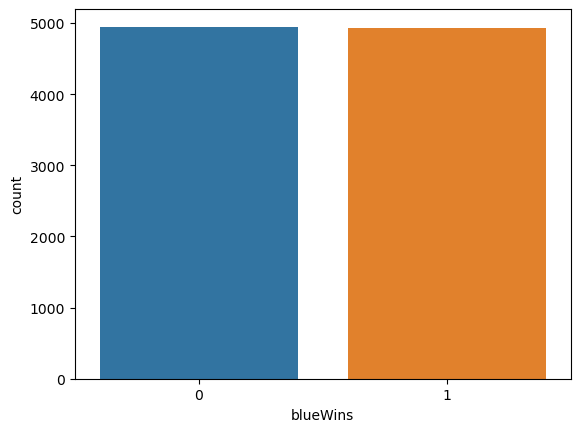

In [7]:
# Bar plot of the outcomes to see how they are distributed
sns.countplot(x='blueWins', data=df)
plt.show()

In [8]:
# Value counts data blueWins
print("Value counts of blueWins:\n", df['blueWins'].value_counts())

Value counts of blueWins:
 0    4949
1    4930
Name: blueWins, dtype: int64


# Buatlah catatan dari hasil data preprocessing

#### Importing required libraries

In [ ]:
# - Missing values: Column X has Y missing values and we decided to remove the rows with missing values.
# - Data types: Converted column A to datetime type for further analysis.
# - Quasi-constant columns: Identified column Z as quasi-constant and decided to drop it.
# - Class imbalance: The target variable 'blueWins' shows some class imbalance, with more 0s than 1s.

## 3. Data Splitting into train and test set

In [12]:
# Data Splitting into train and test set
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop('blueWins', axis=1)
y = df['blueWins']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Feature Selection and Compare Each Model

Method 1: Feature Selection using different methods and checking with different models

Feature Selection using Feature importance of Random Forest Classifier

In [13]:
# Splitting the data into training and testing sets
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
selected_features_rfc = feature_importances['Feature'][:10].values
print("Selected Features using RFC:", selected_features_rfc)

Selected Features using RFC: ['blueGoldDiff' 'redGoldDiff' 'redExperienceDiff' 'blueExperienceDiff'
 'blueGoldPerMin' 'redTotalGold' 'redGoldPerMin' 'blueTotalExperience'
 'blueTotalGold' 'redTotalExperience']


Feature Selection using Recursive feature extraction (RFE)

In [14]:
# Feature Selection using Recursive feature extraction (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features_rfe = X_train.columns[rfe.support_].values
print("Selected Features using RFE:", selected_features_rfe)

Selected Features using RFE: ['gameId' 'blueTotalGold' 'blueTotalExperience' 'blueGoldDiff'
 'blueExperienceDiff' 'blueGoldPerMin' 'redTotalGold' 'redTotalExperience'
 'redGoldDiff' 'redExperienceDiff']


## 5. Modelling and Evaluation


In [15]:
# Model 1: Random Forest Classifier
from sklearn.metrics import accuracy_score, classification_report

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train[selected_features_rfc], y_train)
y_pred_rfc = rfc_model.predict(X_test[selected_features_rfc])

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
classification_report_rfc = classification_report(y_test, y_pred_rfc)
print("Accuracy (RFC):", accuracy_rfc)
print("Classification Report (RFC):\n", classification_report_rfc)

# Model 2: Logistic Regression with RFE-selected features
logreg_model = LogisticRegression()
logreg_model.fit(X_train[selected_features_rfe], y_train)
y_pred_logreg = logreg_model.predict(X_test[selected_features_rfe])

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)
print("Accuracy (Logistic Regression with RFE):", accuracy_logreg)
print("Classification Report (Logistic Regression with RFE):\n", classification_report_logreg)

Accuracy (RFC): 0.7019230769230769
Classification Report (RFC):
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       983
           1       0.71      0.69      0.70       993

    accuracy                           0.70      1976
   macro avg       0.70      0.70      0.70      1976
weighted avg       0.70      0.70      0.70      1976

Accuracy (Logistic Regression with RFE): 0.4974696356275304
Classification Report (Logistic Regression with RFE):
               precision    recall  f1-score   support

           0       0.50      1.00      0.66       983
           1       0.00      0.00      0.00       993

    accuracy                           0.50      1976
   macro avg       0.25      0.50      0.33      1976
weighted avg       0.25      0.50      0.33      1976



C:\Users\Aisyah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aisyah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aisyah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
